In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree

from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

df = pd.read_csv(list(uploaded.keys())[0])
df.head()

Saving EuroMart_Stores.csv to EuroMart_Stores.csv


,Unnamed: 0,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Feedback?
0,0,BN-2011-7407039,2011-01-01,Ruby Patel,Sweden,Stockholm,Stockholm,North,Home Office,Economy Plus,Office Supplies,Paper,"Enermax Note Cards, Premium",0.5,45,-26,3,False
1,1,AZ-2011-9050313,2011-01-03,Summer Hayward,United Kingdom,England,Southport,North,Consumer,Economy,Furniture,Bookcases,"Dania Corner Shelving, Traditional",0.0,854,290,7,True
2,2,AZ-2011-6674300,2011-01-04,Devin Huddleston,France,Auvergne-Rhône-Alpes,Valence,Central,Consumer,Economy,Office Supplies,Art,"Binney & Smith Sketch Pad, Easy-Erase",0.0,140,21,3,True
3,3,BN-2011-2819714,2011-01-04,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Art,"Boston Markers, Easy-Erase",0.5,27,-22,2,True
4,4,BN-2011-2819714,2011-01-04,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Storage,"Eldon Folders, Single Width",0.5,17,-1,2,True


In [6]:
df


,Unnamed: 0,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Feedback?
0,0,BN-2011-7407039,2011-01-01,Ruby Patel,Sweden,Stockholm,Stockholm,North,Home Office,Economy Plus,Office Supplies,Paper,"Enermax Note Cards, Premium",0.5,45,-26,3,False
1,1,AZ-2011-9050313,2011-01-03,Summer Hayward,United Kingdom,England,Southport,North,Consumer,Economy,Furniture,Bookcases,"Dania Corner Shelving, Traditional",0.0,854,290,7,True
2,2,AZ-2011-6674300,2011-01-04,Devin Huddleston,France,Auvergne-Rhône-Alpes,Valence,Central,Consumer,Economy,Office Supplies,Art,"Binney & Smith Sketch Pad, Easy-Erase",0.0,140,21,3,True
3,3,BN-2011-2819714,2011-01-04,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Art,"Boston Markers, Easy-Erase",0.5,27,-22,2,True
4,4,BN-2011-2819714,2011-01-04,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Storage,"Eldon Folders, Single Width",0.5,17,-1,2,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8042,8042,AZ-2014-766953,2014-12-31,Jose Gambino,United Kingdom,England,Maidenhead,North,Corporate,Economy,Furniture,Bookcases,"Ikea Stackable Bookrack, Traditional",0.0,245,91,2,True
8043,8043,BN-2014-4140795,2014-12-31,Daniel Hamilton,Netherlands,North Brabant,Eindhoven,Central,Home Office,Economy Plus,Office Supplies,Art,"BIC Pencil Sharpener, Fluorescent",0.5,30,-10,2,False
8044,8044,BN-2014-4140795,2014-12-31,Daniel Hamilton,Netherlands,North Brabant,Eindhoven,Central,Home Office,Economy Plus,Office Supplies,Binders,"Avery Binder Covers, Recycled",0.5,23,-6,4,True
8045,8045,BN-2014-4140795,2014-12-31,Daniel Hamilton,Netherlands,North Brabant,Eindhoven,Central,Home Office,Economy Plus,Technology,Machines,"StarTech Phone, Red",0.5,108,-19,3,False


In [7]:
df.head()

,Unnamed: 0,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Feedback?
0,0,BN-2011-7407039,2011-01-01,Ruby Patel,Sweden,Stockholm,Stockholm,North,Home Office,Economy Plus,Office Supplies,Paper,"Enermax Note Cards, Premium",0.5,45,-26,3,False
1,1,AZ-2011-9050313,2011-01-03,Summer Hayward,United Kingdom,England,Southport,North,Consumer,Economy,Furniture,Bookcases,"Dania Corner Shelving, Traditional",0.0,854,290,7,True
2,2,AZ-2011-6674300,2011-01-04,Devin Huddleston,France,Auvergne-Rhône-Alpes,Valence,Central,Consumer,Economy,Office Supplies,Art,"Binney & Smith Sketch Pad, Easy-Erase",0.0,140,21,3,True
3,3,BN-2011-2819714,2011-01-04,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Art,"Boston Markers, Easy-Erase",0.5,27,-22,2,True
4,4,BN-2011-2819714,2011-01-04,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Storage,"Eldon Folders, Single Width",0.5,17,-1,2,True


In [8]:
df.tail()

,Unnamed: 0,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Feedback?
8042,8042,AZ-2014-766953,2014-12-31,Jose Gambino,United Kingdom,England,Maidenhead,North,Corporate,Economy,Furniture,Bookcases,"Ikea Stackable Bookrack, Traditional",0.0,245,91,2,True
8043,8043,BN-2014-4140795,2014-12-31,Daniel Hamilton,Netherlands,North Brabant,Eindhoven,Central,Home Office,Economy Plus,Office Supplies,Art,"BIC Pencil Sharpener, Fluorescent",0.5,30,-10,2,False
8044,8044,BN-2014-4140795,2014-12-31,Daniel Hamilton,Netherlands,North Brabant,Eindhoven,Central,Home Office,Economy Plus,Office Supplies,Binders,"Avery Binder Covers, Recycled",0.5,23,-6,4,True
8045,8045,BN-2014-4140795,2014-12-31,Daniel Hamilton,Netherlands,North Brabant,Eindhoven,Central,Home Office,Economy Plus,Technology,Machines,"StarTech Phone, Red",0.5,108,-19,3,False
8046,8046,AZ-2014-766953,2014-12-31,Jose Gambino,United Kingdom,England,Maidenhead,North,Corporate,Economy,Technology,Phones,"Motorola Audio Dock, VoIP",0.0,867,251,5,False


In [9]:
df.nunique()

,0
Unnamed: 0,8047
Order ID,4117
Order Date,1214
Customer Name,792
Country,15
State,127
City,999
Region,3
Segment,3
Ship Mode,4


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8047 entries, 0 to 8046
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     8047 non-null   int64  
 1   Order ID       8047 non-null   object 
 2   Order Date     8047 non-null   object 
 3   Customer Name  8047 non-null   object 
 4   Country        8047 non-null   object 
 5   State          8047 non-null   object 
 6   City           8047 non-null   object 
 7   Region         8047 non-null   object 
 8   Segment        8047 non-null   object 
 9   Ship Mode      8047 non-null   object 
 10  Category       8047 non-null   object 
 11  Sub-Category   8047 non-null   object 
 12  Product Name   8047 non-null   object 
 13  Discount       8047 non-null   float64
 14  Sales          8047 non-null   int64  
 15  Profit         8047 non-null   int64  
 16  Quantity       8047 non-null   int64  
 17  Feedback?      8047 non-null   bool   
dtypes: bool(

In [11]:
df.describe()

,Unnamed: 0,Discount,Sales,Profit,Quantity
count,8047.000000,8047.000000,8047.000000,8047.000000,8047.000000
mean,4023.000000,0.110047,291.845657,35.198211,3.772089
std,2323.113141,0.181773,485.212156,178.125844,2.203369
min,0.000000,0.000000,3.000000,-3060.000000,1.000000
25%,2011.500000,0.000000,48.000000,1.000000,2.000000
50%,4023.000000,0.000000,117.000000,14.000000,3.000000
75%,6034.500000,0.100000,313.000000,47.000000,5.000000
max,8046.000000,0.850000,6517.000000,2476.000000,14.000000


In [13]:
df.columns

Index(['Unnamed: 0', 'Order ID', 'Order Date', 'Customer Name', 'Country',
       'State', 'City', 'Region', 'Segment', 'Ship Mode', 'Category',
       'Sub-Category', 'Product Name', 'Discount', 'Sales', 'Profit',
       'Quantity', 'Feedback?'],
      dtype='object')

In [12]:
df.shape

(8047, 18)

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df.isnull().sum()

,0
Unnamed: 0,0
Order ID,0
Order Date,0
Customer Name,0
Country,0
State,0
City,0
Region,0
Segment,0
Ship Mode,0


In [ ]:
# Graph of Profit data
sns.countplot(x='Profit',data=df,hue='Profit')
plt.title(" Profit data ")
plt.show()

<Axes: xlabel='Profit', ylabel='Sales'>

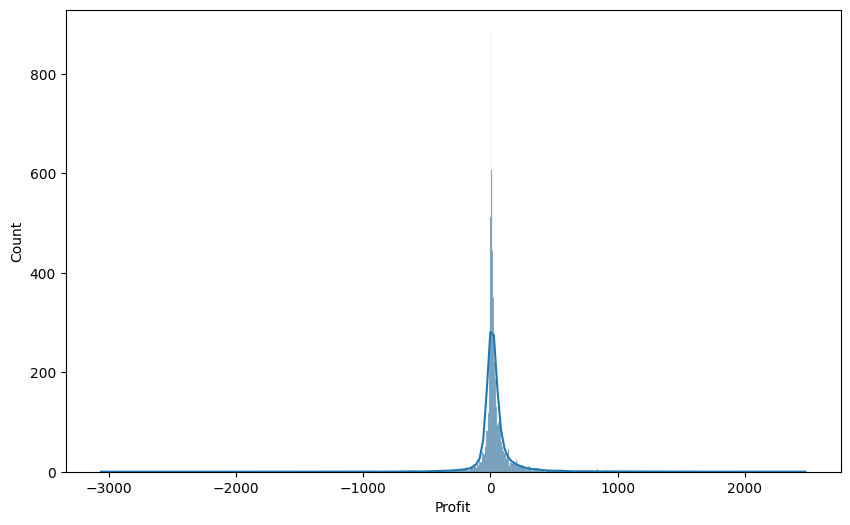

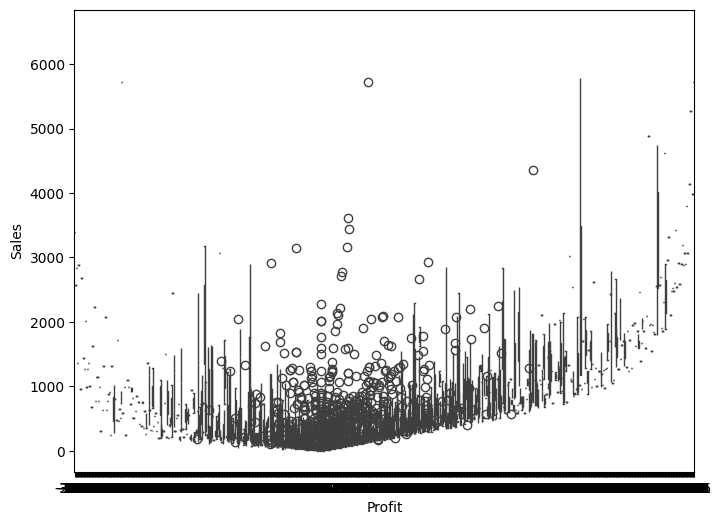

In [24]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Profit'], kde=True)

plt.figure(figsize=(8, 6))
sns.boxplot(x='Profit', y='Sales', data=df)

<Figure size 1000x500 with 0 Axes>

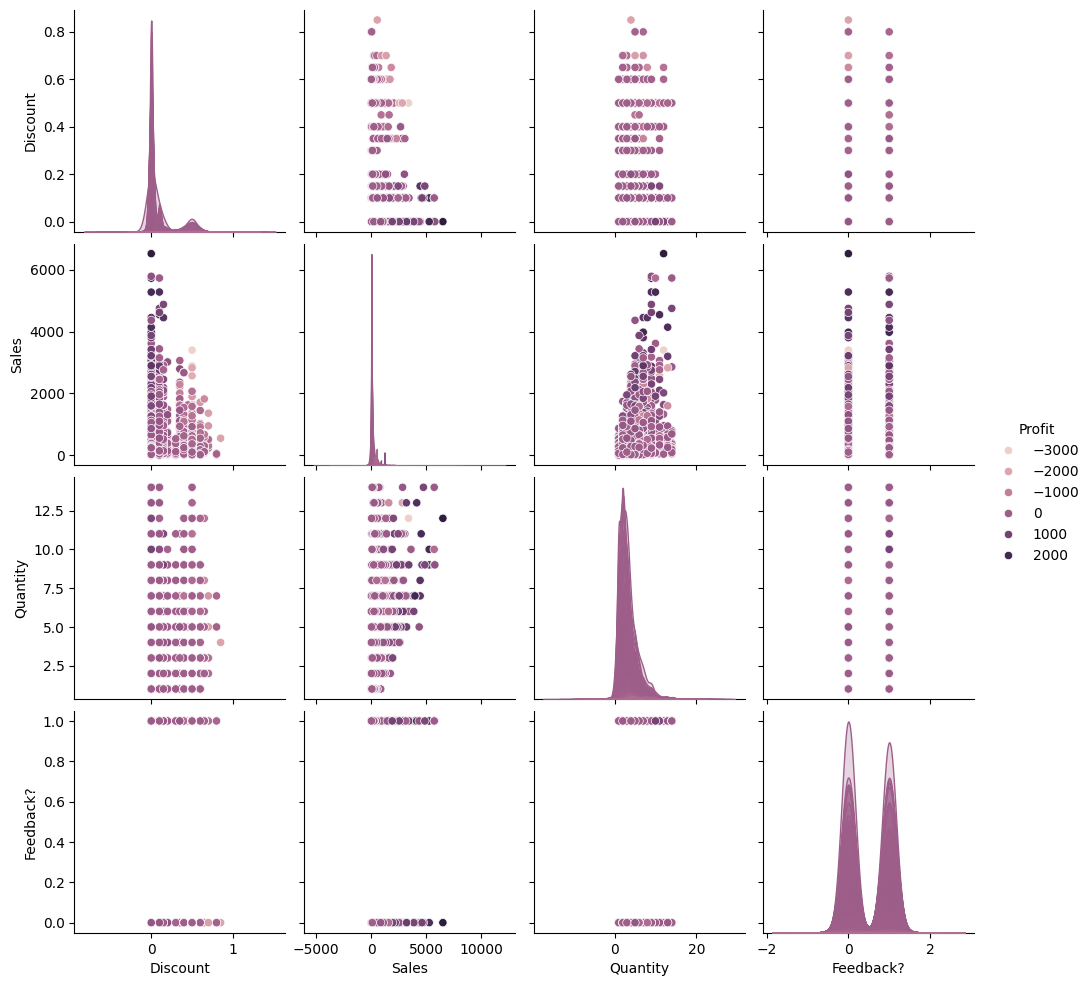

In [25]:
# Pairplot graph
plt.figure(figsize=(10,5))
sns.pairplot(df[['Order ID'	,'Order Date',	'Customer Name',	'Country'	,'State'	,'City'	,'Region'	,'Segment'	,'Ship Mode'	,'Category'	,'Sub-Category',	'Product Name'	,'Discount'	,'Sales'	,'Profit',	'Quantity','Feedback?'	]], hue='Profit')

In [43]:
S=df.select_dtypes(include=np.number)
S

,Unnamed: 0,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Feedback?
0,0,677,12,103,847,1,2,1,1,12,670,0.5,45,-26,3,0
1,1,724,14,41,841,1,0,0,0,4,513,0.0,854,290,7,1
2,2,177,4,7,909,0,0,0,1,2,294,0.0,140,21,3,1
3,3,540,14,41,109,1,1,0,1,2,306,0.5,27,-22,2,1
4,4,540,14,41,109,1,1,0,1,14,585,0.5,17,-1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8042,8042,391,14,41,554,1,1,0,0,4,1017,0.0,245,91,2,1
8043,8043,156,8,79,287,0,2,1,1,2,216,0.5,30,-10,2,0
8044,8044,156,8,79,287,0,2,1,1,3,162,0.5,23,-6,4,1
8045,8045,156,8,79,287,0,2,1,2,11,1666,0.5,108,-19,3,0


In [58]:
label_encoder = LabelEncoder()
df['Order ID'] = label_encoder.fit_transform(df['Order ID'])

In [32]:
label_encoder = LabelEncoder()
df['Customer Name'] = label_encoder.fit_transform(df['Customer Name'])

In [33]:
label_encoder = LabelEncoder()
df['Country'] = label_encoder.fit_transform(df['Country'])

In [34]:
label_encoder = LabelEncoder()
df['State'] = label_encoder.fit_transform(df['State'])

In [35]:
label_encoder = LabelEncoder()
df['City'] = label_encoder.fit_transform(df['City'])

In [36]:
label_encoder = LabelEncoder()
df['Region'] = label_encoder.fit_transform(df['Region'])

In [71]:
if df is None:
    print("Warning: DataFrame 'df' is None. Please check previous cell outputs for 'df = df.drop(...)' with inplace=True.")
else:
    label_encoder = LabelEncoder()
    df['Segment'] = label_encoder.fit_transform(df['Segment'])


In [38]:
label_encoder = LabelEncoder()
df['Ship Mode'] = label_encoder.fit_transform(df['Ship Mode'])

In [39]:
label_encoder = LabelEncoder()
df['Category'] = label_encoder.fit_transform(df['Category'])

In [40]:
label_encoder = LabelEncoder()
df['Sub-Category'] = label_encoder.fit_transform(df['Sub-Category'])

In [41]:
label_encoder = LabelEncoder()
df['Product Name'] = label_encoder.fit_transform(df['Product Name'])

In [42]:
label_encoder = LabelEncoder()
df['Feedback?'] = label_encoder.fit_transform(df['Feedback?'])

<Axes: >

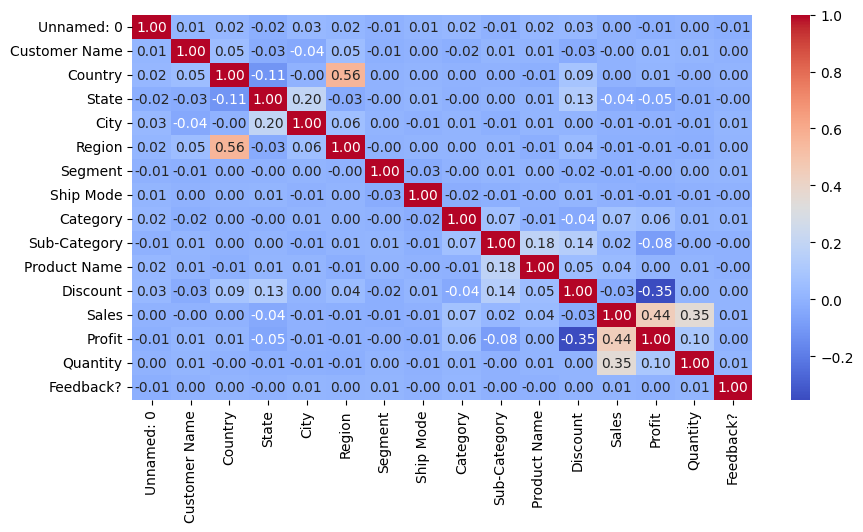

In [44]:
# Heatmap for
a=S.corr()
plt.figure(figsize=(10,5))
sns.heatmap(a,annot=True,cmap='coolwarm',fmt='.2f')

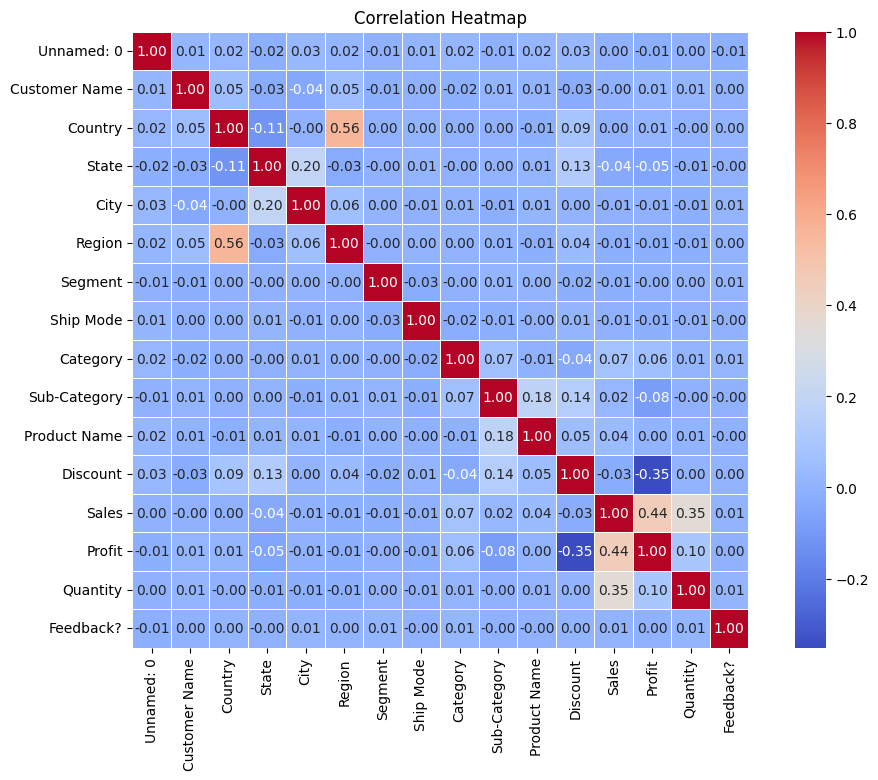

In [45]:
# Headmap

plt.figure(figsize=(12, 8))
sns.heatmap(
    df.select_dtypes(include='number').corr(),
    annot=True, fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5, square=True
)

plt.title("Correlation Heatmap")
plt.show()

In [46]:
#Declaring the  target feature and independent feature
x=df.drop(['Profit', 'Order ID', 'Order Date'],axis=1)
y=df['Profit']

In [47]:
#splitting the datasets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [48]:
# Initialize the linear regression model
model=LinearRegression()

#Fit model on the traning data
model.fit(x_train,y_train)

LinearRegression()

In [49]:
y_pred=model.predict(x_test)
y_pred

array([ 78.2315965 ,  19.80542371, 174.18620556, ..., 112.69472213,
         2.52167485,  42.01635499])

In [50]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.3630976929359958

In [73]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print(f"Accuracy: {r2_score(y_test, y_pred)*100:.2f}%")

Accuracy: 68.35%


In [64]:
input_data =(0, 677, 12, 103, 847, 1, 2, 1, 1, 12, 670, 0.5, 45, 3, 0)

# changing the input data to a numpy array

input_data_as_numpy_array = np.asarray(input_data)

# reshape the np array as we are predicting for one instance

input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction =model.predict(input_data_reshaped)

print(prediction)
# The prediction value is continuous, so comparing it to 0 for a binary outcome (like 'buy' or 'not buy') might not be appropriate
# Instead, you might want to interpret the predicted profit directly.
# For example, if profit is positive, it's a 'buy', otherwise 'not buy'.
# Let's adjust the interpretation based on predicted profit.
if prediction[0] > 0:
    print("The predicted profit is positive.")
else:
    print("The predicted profit is not positive.")

[-25.725]
The predicted profit is not positive.


In [52]:
if y_pred[0] == 0:
    print("The person is NOT likely to buy the product.")
else:
    print("The person is likely to buy the product.")

The person is likely to buy the product.


In [68]:
input_data =(8042, 391, 14 ,41 ,554 ,1 ,1, 0, 0 ,4 ,1017 ,0.0 ,245, 2,1)

# changing the input data to a numpy array

input_data_as_numpy_array = np.asarray(input_data)

# reshape the np array as we are predicting for one instance

input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction =model.predict(input_data_reshaped)

print(prediction)
# The prediction value is continuous, so comparing it to 0 for a binary outcome (like 'buy' or 'not buy') might not be appropriate
# Instead, you might want to interpret the predicted profit directly.
# For example, if profit is positive, it's a 'buy', otherwise 'not buy'.
# Let's adjust the interpretation based on predicted profit.
if prediction[0] > 0:
    print("The predicted profit is positive.")
else:
    print("The predicted profit is not positive.")

[55.09]
The predicted profit is positive.


In [59]:
df.head(10)

,Unnamed: 0,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Feedback?
0,0,3344,2011-01-01,677,12,103,847,1,2,1,1,12,670,0.5,45,-26,3,0
1,1,510,2011-01-03,724,14,41,841,1,0,0,0,4,513,0.0,854,290,7,1
2,2,349,2011-01-04,177,4,7,909,0,0,0,1,2,294,0.0,140,21,3,1
3,3,3249,2011-01-04,540,14,41,109,1,1,0,1,2,306,0.5,27,-22,2,1
4,4,3249,2011-01-04,540,14,41,109,1,1,0,1,14,585,0.5,17,-1,2,1
5,5,319,2011-01-05,155,4,7,284,0,2,3,1,2,288,0.0,90,21,3,0
6,6,319,2011-01-05,155,4,7,284,0,2,3,1,2,1520,0.0,207,77,4,0
7,7,129,2011-01-07,253,4,87,473,0,1,3,0,4,374,0.1,155,36,1,1
8,8,129,2011-01-07,253,4,87,473,0,1,3,1,8,43,0.0,33,2,3,1
9,9,129,2011-01-07,253,4,87,473,0,1,3,1,14,1609,0.1,716,143,4,1
